In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()

In [ ]:
raw_csv_data = pd.read_csv("Book1.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace = True)
df_comp = df_comp.asfreq ('b')
df_comp = df_comp.fillna(method= 'ffill')

In [ ]:
#Equation of moving average

r@t = c+bE@t-1 + E@t

r@t = current period


b = a numeric coefficient for the value associated with the 1st lag




E@t = residual for the current period
































E@t-1 = residuals for the past period

|b| < 1 , this is kept to prevent compounded effects exploding in magnitude

MA(1) = AR(infnite) + certain restrictions

In [ ]:
df_comp['market_value'] = df_comp.ftse

In [ ]:
df_comp['market_value'] = df_comp.spx

In [ ]:
del df_comp['spx']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df_test = df_comp.iloc[:size], df_comp.iloc[size:]

KeyError: ignored

In [ ]:
df_comp['returns'] = df_comp.market_value.pct_change(1)*100

ACF for returns

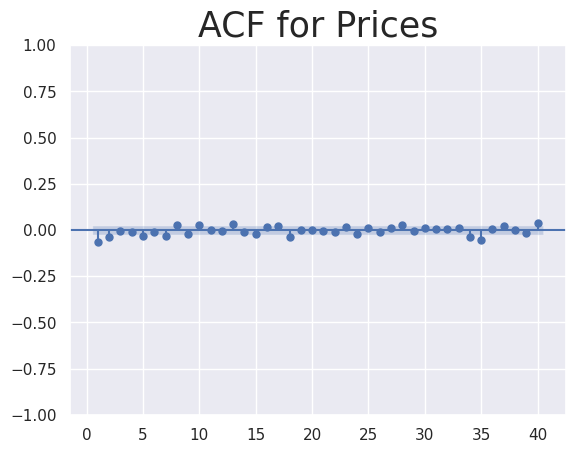

In [ ]:
sgt.plot_acf(df_comp.returns[1:], zero = False, lags = 40)
plt.title("ACF for Prices", size = 25)
plt.show()

MA(1) for returns

In [ ]:
model_ret_ma_1 = ARIMA(df_comp.returns[1:], order =(0,0,1))
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -9665.996
Date:                Thu, 22 Jun 2023   AIC                          19337.992
Time:                        08:31:34   BIC                          19358.226
Sample:                    01-10-1994   HQIC                         19345.003
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0351      0.014      2.582      0.010       0.008       0.062
ma.L1         -0.0727      0.007    -10.013      0.000      -0.087      -0.058
sigma2         1.2743      0.010    130.850      0.000       1.255       1.293
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             21915.23
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ret_ma_2 = ARIMA(df_comp.returns[1:], order =(0,0,2))
results_ret_ma_2 = model_ret_ma_2.fit()
results_ret_ma_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -9661.433
Date:                Thu, 22 Jun 2023   AIC                          19330.867
Time:                        08:31:36   BIC                          19357.845
Sample:                    01-10-1994   HQIC                         19340.214
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0351      0.013      2.643      0.008       0.009       0.061
ma.L1         -0.0708      0.007     -9.727      0.000      -0.085      -0.057
ma.L2         -0.0389      0.006     -6.523      0.000      -0.051      -0.027
sigma2         1.2725      0.010    124.908      0.000       1.253       1.292
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20572.92
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
def LLR_test(mod_1,mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,DF).round(3)
    return p
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_1, model_ret_ma_2)))



LLR test p-value = 0.003


In [ ]:
model_ret_ma_3 = ARIMA(df_comp.returns[1:], order =(0,0,3))
results_ret_ma_3 = model_ret_ma_3.fit()
results_ret_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -9661.046
Date:                Thu, 22 Jun 2023   AIC                          19332.093
Time:                        08:31:41   BIC                          19365.815
Sample:                    01-10-1994   HQIC                         19343.777
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0351      0.013      2.656      0.008       0.009       0.061
ma.L1         -0.0708      0.007     -9.702      0.000      -0.085      -0.056
ma.L2         -0.0390      0.006     -6.522      0.000      -0.051      -0.027
ma.L3         -0.0113      0.007     -1.576      0.115      -0.025       0.003
sigma2         1.2723      0.010    124.805      0.000       1.252       1.292
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20548.94
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ret_ma_4 = ARIMA(df_comp.returns[1:], order =(0,0,4))
results_ret_ma_4 = model_ret_ma_4.fit()
results_ret_ma_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                 ARIMA(0, 0, 4)   Log Likelihood               -9660.144
Date:                Thu, 22 Jun 2023   AIC                          19332.288
Time:                        08:31:43   BIC                          19372.755
Sample:                    01-10-1994   HQIC                         19346.309
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0351      0.013      2.672      0.008       0.009       0.061
ma.L1         -0.0718      0.007     -9.812      0.000      -0.086      -0.057
ma.L2         -0.0387      0.006     -6.455      0.000      -0.050      -0.027
ma.L3         -0.0110      0.007     -1.529      0.126      -0.025       0.003
ma.L4         -0.0165      0.007     -2.499      0.012      -0.030      -0.004
sigma2         1.2719      0.010    123.995      0.000       1.252       1.292
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20350.02
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ret_ma_5 = ARIMA(df_comp.returns[1:], order =(0,0,5))
results_ret_ma_5 = model_ret_ma_5.fit()
results_ret_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -9655.775
Date:                Thu, 22 Jun 2023   AIC                          19325.549
Time:                        08:31:45   BIC                          19372.760
Sample:                    01-10-1994   HQIC                         19341.907
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0351      0.013      2.759      0.006       0.010       0.060
ma.L1         -0.0720      0.007     -9.780      0.000      -0.086      -0.058
ma.L2         -0.0404      0.006     -6.731      0.000      -0.052      -0.029
ma.L3         -0.0072      0.007     -1.000      0.317      -0.021       0.007
ma.L4         -0.0149      0.007     -2.244      0.025      -0.028      -0.002
ma.L5         -0.0366      0.006     -5.846      0.000      -0.049      -0.024
sigma2         1.2702      0.010    123.321      0.000       1.250       1.290
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             19850.14
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
LLR_test(model_ret_ma_1, model_ret_ma_2)

0.003

In [ ]:
LLR_test(model_ret_ma_2, model_ret_ma_3)

0.379

In [ ]:
LLR_test(model_ret_ma_3, model_ret_ma_4)

0.179

In [ ]:
LLR_test(model_ret_ma_4, model_ret_ma_5)

0.003

Residuals for Returns

In [ ]:
df_comp['res_ret_ma_5'] = results_ret_ma_5.resid[1:]

In [ ]:
print("The mean of the residuals is " + str( round(df_comp.res_ret_ma_5.mean(),3)) + "\nThe variance of the residuals is " + str(round(df_comp.res_ret_ma_5.var(),3)))

The mean of the residuals is -0.0
The variance of the residuals is 1.27


In [ ]:
import math


In [ ]:
round(math.sqrt(df_comp.res_ret_ma_5.var()),3)


1.127

Gaussian White Noise implies Normality



<function matplotlib.pyplot.show(close=None, block=None)>

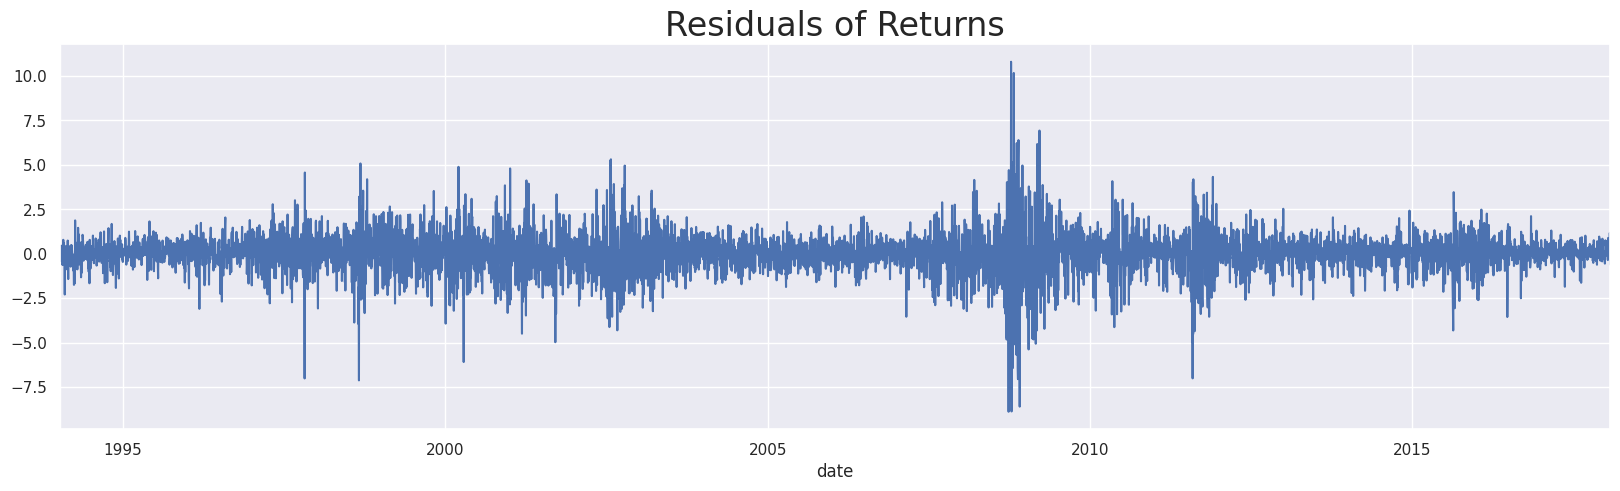

In [ ]:
df_comp.res_ret_ma_5[1:].plot(figsize = (20,5))
plt.title("Residuals of Returns",size = 24)
plt.show

In [ ]:

import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
sts.adfuller(df_comp.res_ret_ma_5[2:])

(-14.117218656693929,
 2.460495784189378e-26,
 34,
 6240,
 {'1%': -3.4313983961705303,
  '5%': -2.8620032980054413,
  '10%': -2.567016610602605},
 19219.57440580745)

Text(0.5, 1.0, 'ACF of Residuals for returns')

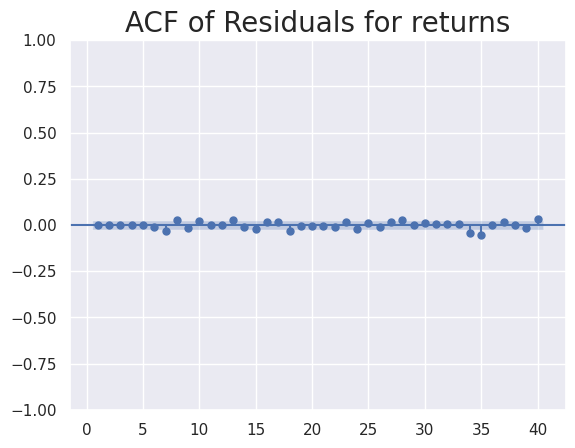

In [ ]:
#ACF
sgt.plot_acf(df_comp.res_ret_ma_5[2:], lags = 40, zero = False)
plt.title("ACF of Residuals for returns", size = 20)

NON- Stationarity doesn't implies white noise, stationarity implies white noise and normality


**Normalised Returns**

In [ ]:
bench_ret = df_comp.returns.iloc[1]
df_comp['norm_ret'] = df_comp.returns.div(bench_ret).mul(100)

Text(0.5, 1.0, 'ACF of Normalised  returns')

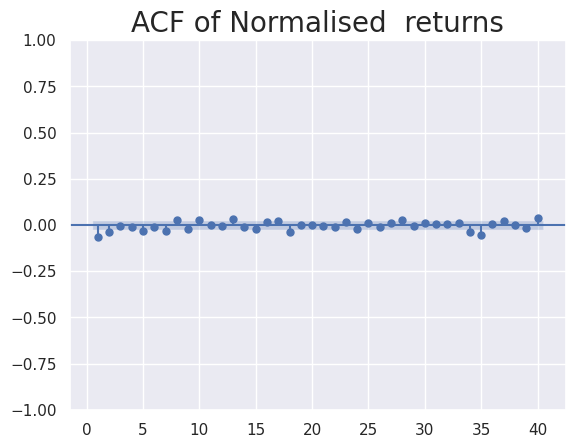

In [ ]:
sgt.plot_acf(df_comp.norm_ret[1:], lags = 40, zero = False)
plt.title("ACF of Normalised  returns", size = 20)

In [ ]:
model_norm_ret_ma_5 = ARIMA(df_comp.norm_ret[1:], order = (0,0,8))
results_norm_ret_ma_5 = model_norm_ret_ma_5.fit()
results_norm_ret_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 6276
Model:                 ARIMA(0, 0, 8)   Log Likelihood              -37714.424
Date:                Thu, 22 Jun 2023   AIC                          75448.848
Time:                        08:52:14   BIC                          75516.293
Sample:                    01-10-1994   HQIC                         75472.217
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0761      1.123      2.739      0.006       0.875       5.277
ma.L1         -0.0702      0.007     -9.448      0.000      -0.085      -0.056
ma.L2         -0.0414      0.006     -6.784      0.000      -0.053      -0.029
ma.L3         -0.0064      0.008     -0.842      0.400      -0.021       0.008
ma.L4         -0.0143      0.007     -2.042      0.041      -0.028      -0.001
ma.L5         -0.0362      0.007     -5.568      0.000      -0.049      -0.023
ma.L6         -0.0073      0.007     -1.095      0.273      -0.020       0.006
ma.L7         -0.0320      0.007     -4.887      0.000      -0.045      -0.019
ma.L8          0.0274      0.007      3.876      0.000       0.014       0.041
sigma2      9745.1199     81.128    120.120      0.000    9586.111    9904.128
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             19329.53
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

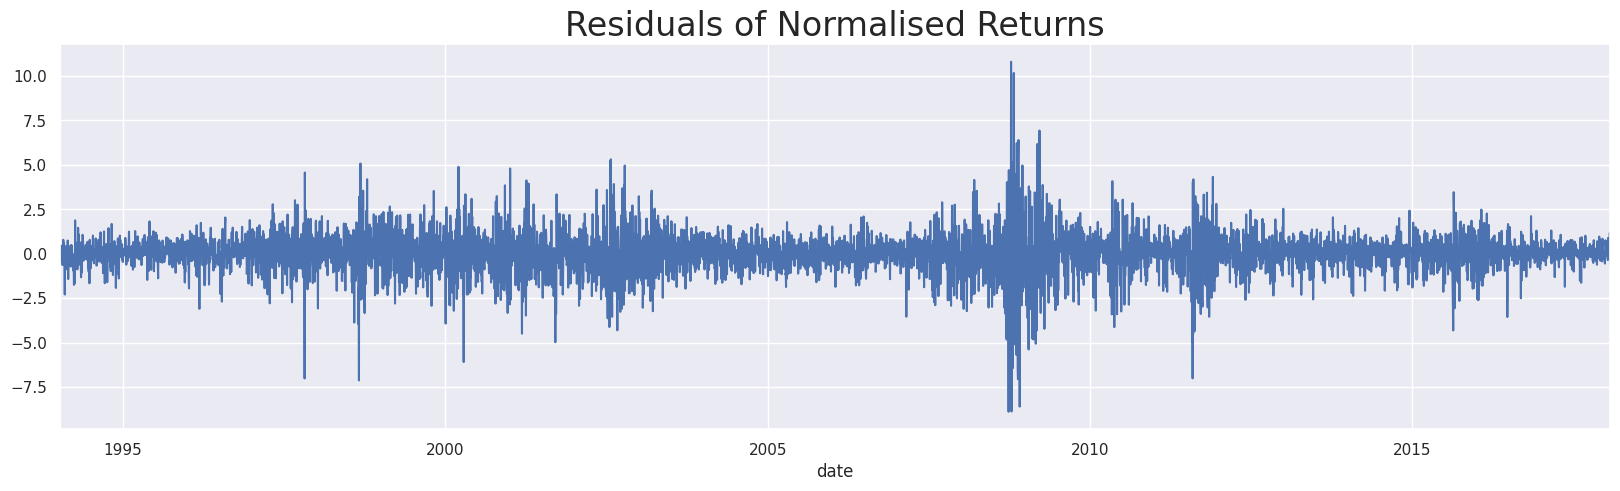

In [ ]:
df_comp['res_norm_ret_ma_5'] = results_ret_ma_5.resid[1:]
df_comp.res_norm_ret_ma_5[1:].plot(figsize=(20,5))
plt.title("Residuals of Normalised Returns", size = 24)
plt.show()

Text(0.5, 1.0, 'ACF of residuals for Normalised  returns')

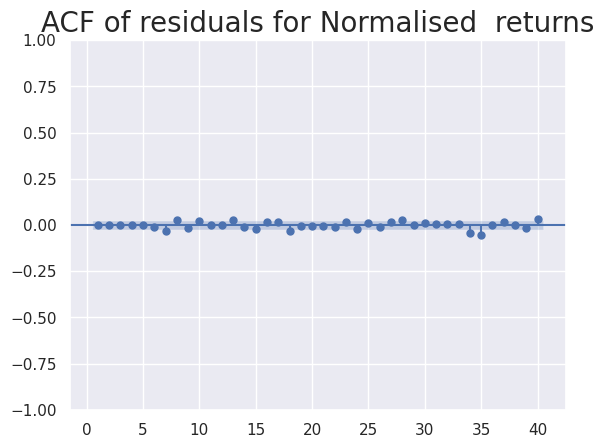

In [ ]:
sgt.plot_acf(df_comp.res_norm_ret_ma_5[2:], lags = 40, zero = False)
plt.title("ACF of residuals for Normalised  returns", size = 20)

**MA Models for Prices**

Text(0.5, 1.0, 'ACF for Prices')

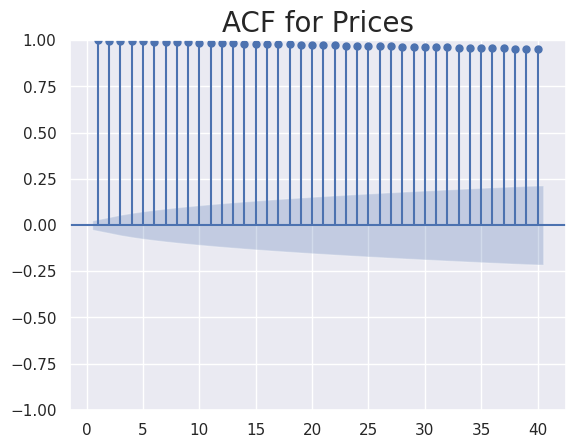

In [ ]:
sgt.plot_acf(df_comp.market_value, lags = 40, zero = False)
plt.title("ACF for Prices", size = 20)

In [ ]:
model_norm_ret_ma_1 = ARIMA(df_comp.norm_ret[1:], order = (0,0,1))
results_norm_ret_ma_1 = model_norm_ret_ma_1.fit()
results_norm_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 6276
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -37730.335
Date:                Thu, 22 Jun 2023   AIC                          75466.671
Time:                        09:30:08   BIC                          75486.904
Sample:                    01-10-1994   HQIC                         75473.681
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0762      1.192      2.581      0.010       0.740       5.412
ma.L1         -0.0727      0.007    -10.008      0.000      -0.087      -0.058
sigma2      9761.9156     74.637    130.792      0.000    9615.630    9908.201
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             21915.24
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# our model tries to keep almost the entire magnitude of the error term from the last period

In [ ]:
# the error term contains all the inforation from the other lags

AR : failed to adjust quickly
MA : aspects smooth out predictions

In [ ]:
#MA needed a baseline
#use previous values to provide that